In [ ]:
print("All the best:)")

All the best:)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os

data_dir = "/content/drive/MyDrive/combined_datasets"
smoke_dir = os.path.join(data_dir, "Wildfire_Smoke.v1-raw.coco")
trees_dir = os.path.join(data_dir, "trees.v1-trees.coco")

smoke_train_dir = os.path.join(smoke_dir, "Wildfire_Smoke.v1-raw.coco")
trees_train_dir = os.path.join(trees_dir, "trees.v1-trees.coco")

In [ ]:
import cv2
# Load smoke images
smoke_images, smoke_labels = [], []
for img in os.listdir(smoke_dir):
   image = cv2.imread(os.path.join(smoke_dir, img))
   smoke_images.append(image)
   smoke_labels.append(0) # 0 for smoke class

In [ ]:
# Load trees images
trees_images, trees_labels = [], []
for img in os.listdir(trees_dir):
   img_path = os.path.join(trees_dir, img)
   image = cv2.imread(img_path)
   trees_images.append(image)
   trees_labels.append(1)


In [ ]:
print("Num smoke images:", len(smoke_images))
print("Num trees images:", len(trees_images))

# Get unique labels
unique_labels_smoke = set(smoke_labels)
unique_labels_trees = set(trees_labels)

print("Classes in smoke dataset:", unique_labels_smoke)
print("Num images per smoke class:")
for c in unique_labels_smoke:
    num_images = smoke_labels.count(c)
    print(f"- Class {c}: {num_images} images")


print("Classes in trees dataset:", unique_labels_trees)
print("Num images per trees class:")
for c in unique_labels_trees:
    num_images = trees_labels.count(c)
    print(f"- Class {c}: {num_images} images")

Num smoke images: 742
Num trees images: 853
Classes in smoke dataset: {0}
Num images per smoke class:
- Class 0: 742 images
Classes in trees dataset: {1}
Num images per trees class:
- Class 1: 853 images


In [ ]:
import cv2
import os
import random

# Define your data directory structure
data_dir = "/content/drive/MyDrive/combined_datasets"
smoke_dir = os.path.join(data_dir, "Wildfire_Smoke.v1-raw.coco")
trees_dir = os.path.join(data_dir, "trees.v1-trees.coco")

smoke_train_dir = os.path.join(smoke_dir, "Wildfire_Smoke.v1-raw.coco")
trees_train_dir = os.path.join(trees_dir, "trees.v1-trees.coco")

# Initialize empty lists for images and labels
combined_images = []
combined_labels = []

# Load smoke images and labels
for img_path in os.listdir(smoke_dir):
    image = cv2.imread(os.path.join(smoke_dir, img_path))
    combined_images.append(image)
    combined_labels.append(0)  # Label smoke images as 0

# Load trees images and labels
for img_path in os.listdir(trees_dir):
    image = cv2.imread(os.path.join(trees_dir, img_path))
    combined_images.append(image)
    combined_labels.append(1)  # Label trees images as 1

# Shuffle both images and labels together to maintain label-image association
combined = list(zip(combined_images, combined_labels))
random.shuffle(combined)

# Unpack shuffled data back into separate lists
combined_images, combined_labels = zip(*combined)

# Print final information
print("Number of images:", len(combined_images))
print("Unique labels:", set(combined_labels))

# Now you have a shuffled combined_images and combined_labels list for your ensemble model!


Number of images: 1595
Unique labels: {0, 1}


In [ ]:
combined_images

(array([[[ 68, 109,  71],
         [ 51,  94,  51],
         [ 64, 110,  63],
         ...,
         [ 71, 135,  89],
         [ 75, 139,  93],
         [ 86, 150, 104]],
 
        [[ 81, 122,  84],
         [ 56,  99,  56],
         [ 63, 107,  60],
         ...,
         [ 93, 157, 111],
         [ 79, 143,  97],
         [ 97, 161, 115]],
 
        [[ 59,  98,  60],
         [ 42,  85,  42],
         [ 52,  96,  49],
         ...,
         [ 73, 137,  91],
         [120, 184, 138],
         [121, 185, 139]],
 
        ...,
 
        [[129, 171, 123],
         [133, 175, 127],
         [109, 151, 103],
         ...,
         [ 78, 117,  72],
         [ 74, 113,  68],
         [ 67, 106,  61]],
 
        [[119, 161, 113],
         [106, 148, 100],
         [ 94, 136,  88],
         ...,
         [ 84, 123,  78],
         [ 80, 119,  74],
         [ 72, 111,  66]],
 
        [[105, 147,  99],
         [107, 149, 101],
         [104, 146,  98],
         ...,
         [ 94, 133,  88],
  

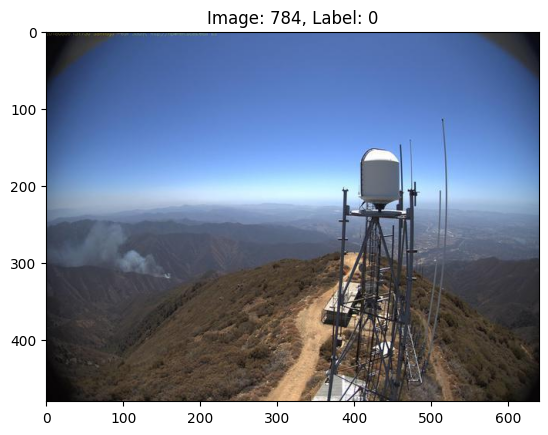

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# ... other code remains the same (until displaying the image)

# Shuffle both images and labels together
combined = list(zip(combined_images, combined_labels))
random.shuffle(combined)

# Unpack shuffled data back into separate lists
combined_images, combined_labels = zip(*combined)

# Get a random index within the range of image count
random_index = np.random.randint(0, len(combined_images))

# Access the image at the randomly chosen index
image = combined_images[random_index]

# Convert the image from BGR to RGB format for Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.title(f"Image: {random_index}, Label: {combined_labels[random_index]}")
plt.show()


In [ ]:
print(combined_images[0].shape, combined_images[10].shape, combined_images[50].shape)


(480, 640, 3) (729, 1094, 3) (729, 1094, 3)


In [ ]:
print(type(combined_images))


<class 'tuple'>


In [ ]:
combined_images = list(combined_images)


In [ ]:
for i in range(5):
    print(combined_images[i].shape)


(480, 640, 3)
(480, 640, 3)
(729, 1094, 3)
(480, 640, 3)
(729, 1094, 3)


In [ ]:
# import numpy as np
print(np.__version__)


1.25.2


In [ ]:
import numpy as np

# Temporary fix for the issue by modifying imgaug library code
import imgaug.augmenters.meta as meta

def _augmenter_active_modified(self, nb_rows, random_state):
    nn = self._get_n(nb_rows, random_state)
    nn = [min(n, len(self)) for n in nn]
    augmenter_active = np.zeros((nb_rows, len(self)), dtype=bool)  # Explicitly setting dtype to bool
    for row_idx, n_true in enumerate(nn):
        if n_true > 0:
            augmenter_active[row_idx, random_state.choice(len(self), n_true, replace=False)] = True
    return augmenter_active

# Override the original method with the modified one
meta.SomeOf._get_augmenter_active = _augmenter_active_modified


To display all the normalised images

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# def normalize_image_minmax(image):
#     """Normalizes an image using min-max scaling to the range [0, 1].

#     Args:
#         image: The image to normalize (NumPy array or OpenCV image object).

#     Returns:
#         The normalized image.
#     """

#     # Ensure float32 type for accurate calculations
#     image = image.astype(np.float32)

#     # Find the minimum and maximum pixel values for each channel
#     min_val = np.min(image, axis=(0, 1))
#     max_val = np.max(image, axis=(0, 1))

#     # Subtract the minimum and divide by the range (max - min)
#     image = (image - min_val) / (max_val - min_val)

#     return image

# # Assuming your original images are stored in "combined_images"
# # Initialize an empty list to store processed images
# processed_images = []

# image_size = (400, 400)  # Replace with your desired image size (optional)

# def process_and_display_image(image_data):
#     """Processes an image (resizing and normalization) and displays it."""

#     if isinstance(image_data, np.ndarray) or isinstance(image_data, cv2.UMat):
#         # Proceed with processing
#         if image_data is not None and image_data.shape != image_size:
#             resized_image = cv2.resize(image_data, image_size, interpolation=cv2.INTER_AREA)
#             normalized_image = normalize_image_minmax(resized_image)
#             processed_images.append(normalized_image)  # Add to processed images list

#             # Ensure color space (BGR to RGB for Matplotlib)
#             if normalized_image.ndim == 3 and normalized_image.shape[2] == 3:
#                 normalized_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB)

#             # Display the normalized image
#             plt.imshow(normalized_image)
#             plt.title("Processed Image")
#             plt.axis("off")  # Hide axes for cleaner display
#             plt.show()

# for i in range(len(combined_images)):
#     image_data = combined_images[i]
#     process_and_display_image(image_data)

# # Close remaining Matplotlib windows
# plt.close('all')


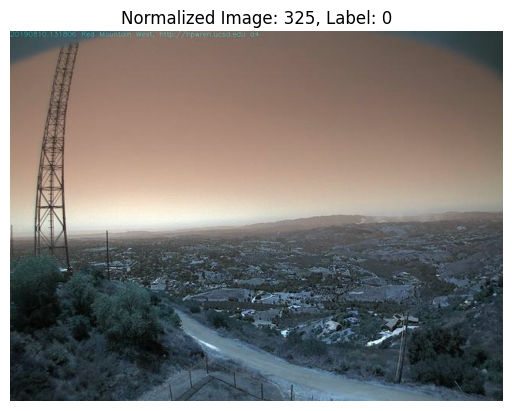

In [ ]:
# to display single normalized image randomly
import cv2
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# Define your data directory structure
data_dir = "/content/drive/MyDrive/combined_datasets"
smoke_dir = os.path.join(data_dir, "Wildfire_Smoke.v1-raw.coco")
trees_dir = os.path.join(data_dir, "trees.v1-trees.coco")

# Initialize empty lists for images and labels
combined_images = []
combined_labels = []

# Load smoke images and labels
for img_path in os.listdir(smoke_dir):
    image = cv2.imread(os.path.join(smoke_dir, img_path))
    combined_images.append(image)
    combined_labels.append(0)  # Label smoke images as 0

# Load trees images and labels
for img_path in os.listdir(trees_dir):
    image = cv2.imread(os.path.join(trees_dir, img_path))
    combined_images.append(image)
    combined_labels.append(1)  # Label trees images as 1

# Shuffle both images and labels together to maintain label-image association
combined = list(zip(combined_images, combined_labels))
random.shuffle(combined)

# Unpack shuffled data back into separate lists
combined_images, combined_labels = zip(*combined)

# Get a random index within the range of image count
random_index = np.random.randint(0, len(combined_images))

# Access the image at the randomly chosen index
image = combined_images[random_index]

# Normalize the image
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))

# Display the normalized image
plt.imshow(normalized_image)
plt.title(f"Normalized Image: {random_index}, Label: {combined_labels[random_index]}")
plt.axis('off')
plt.show()


For normalization, data augmentation and display of all images:

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from imgaug import augmenters as iaa

# def normalize_image_minmax(image):
#     """Normalizes an image using min-max scaling to the range [0, 1].

#     Args:
#         image: The image to normalize (NumPy array or OpenCV image object).

#     Returns:
#         The normalized image.
#     """

#     # Ensure float32 type for accurate calculations
#     image = image.astype(np.float32)

#     # Find the minimum and maximum pixel values for each channel
#     min_val = np.min(image, axis=(0, 1))
#     max_val = np.max(image, axis=(0, 1))

#     # Subtract the minimum and divide by the range (max - min)
#     image = (image - min_val) / (max_val - min_val)

#     return image

# # Assuming your original images are stored in "combined_images"
# # Initialize empty lists for normalized and augmented images
# processed_images = []
# augmented_images = []

# image_size = (400, 400)  # Replace with your desired image size (optional)

# def process_and_augment_image(image_data):
#     """Processes an image (resizing and normalization) and applies data augmentation."""

#     if isinstance(image_data, np.ndarray) or isinstance(image_data, cv2.UMat):
#         # Proceed with processing
#         if image_data is not None and image_data.shape != image_size:
#             resized_image = cv2.resize(image_data, image_size, interpolation=cv2.INTER_AREA)
#             normalized_image = normalize_image_minmax(resized_image)
#             processed_images.append(normalized_image)

#             # Define individual augmentation sequences
#             augmenters = [
#                 iaa.Fliplr(1.0),  # Horizontal flip
#                 iaa.Affine(rotate=15),  # Rotation (+15 degrees)
#                 iaa.Affine(translate_percent=0.2),  # Translation (20% right)
#                 iaa.GaussianBlur(sigma=0.5),  # Gaussian blur
#                 iaa.contrast.LinearContrast(1.5),  # Contrast increase
#             ]

#              # Display original image
#             display_image(resized_image, title="Original")


#             # Apply each augmentation separately and visualize
#             for augmenter in augmenters:
#                 augmented_image = augmenter.augment_image(normalized_image)
#                 display_image(augmented_image, title=f"{augmenter.__class__.__name__} applied")

# # ... (Add your code to load or generate your original images)

# def display_image(image, title="Image"):
#     """Displays a single image with a given title."""

#     fig, ax = plt.subplots()
#     ax.imshow(image)
#     ax.axis("off")
#     fig.suptitle(title, fontsize=16)
#     plt.show()

# def display_images(images, title="Images"):
#     """Displays multiple images in a grid with a given title."""

#     num_images = len(images)
#     rows = int(np.ceil(np.sqrt(num_images)))
#     cols = int(np.ceil(num_images / rows))

#     fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

#     for i, image in enumerate(images):
#         ax = axes.flat[i]  # Access each AxesSubplot using flat attribute
#         ax.imshow(image)
#         ax.axis("off")

#     fig.suptitle(title, fontsize=16)
#     plt.tight_layout()
#     plt.show()

# image_size = (400, 400)

# # Process and augment images
# for i in range(len(combined_images)):
#     image_data = combined_images[i]
#     process_and_augment_image(image_data)

# # Display original and augmented images individually
# for i in range(len(processed_images)):
#     original_image = processed_images[i]
#     augmented_image = augmented_images[i]

#     # Display original image
#     display_image(original_image, title=f"Original Image {i}")

#     # Display augmented image
#     display_image(augmented_image, title=f"Augmented Image {i}")

# # Alternatively, display side-by-side (uncomment to use):
# # for i in range(len(processed_


Number of images: 1595
Unique labels: {0, 1}


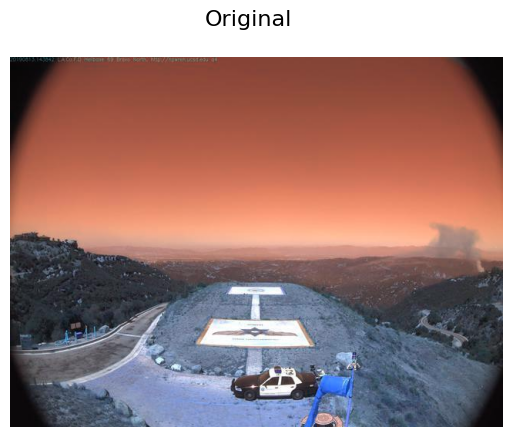

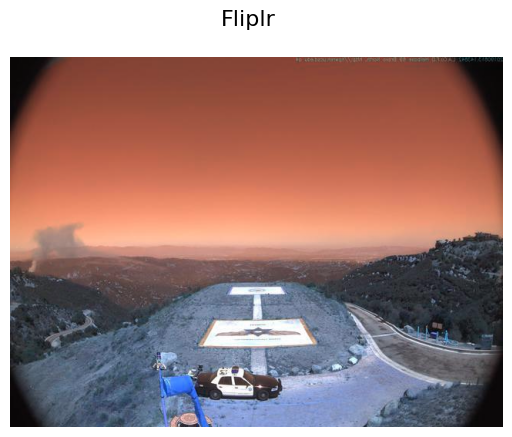

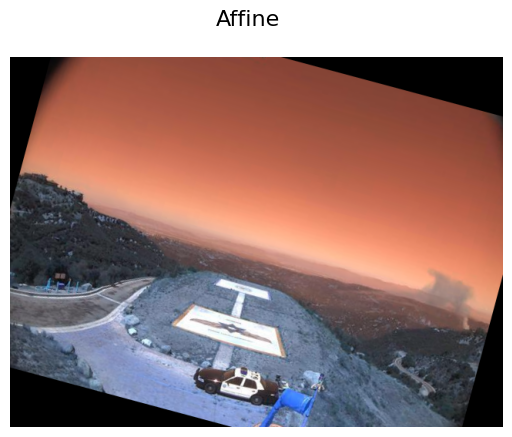

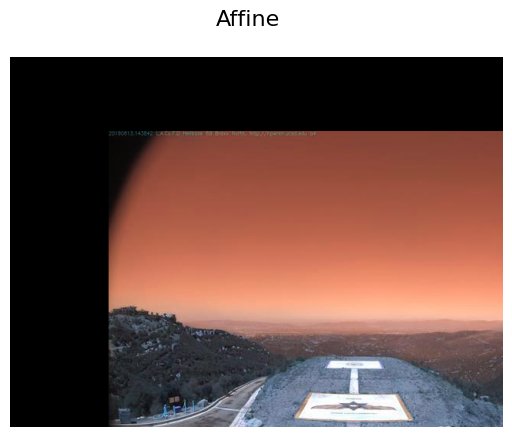

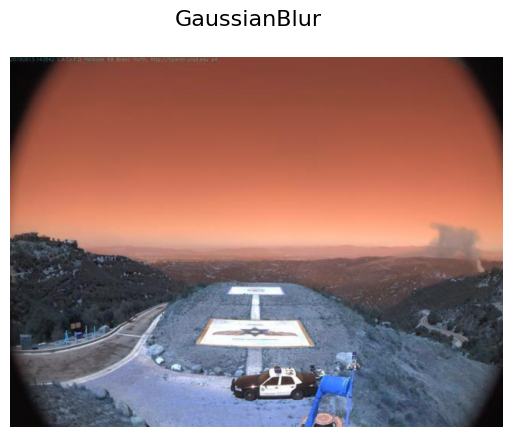

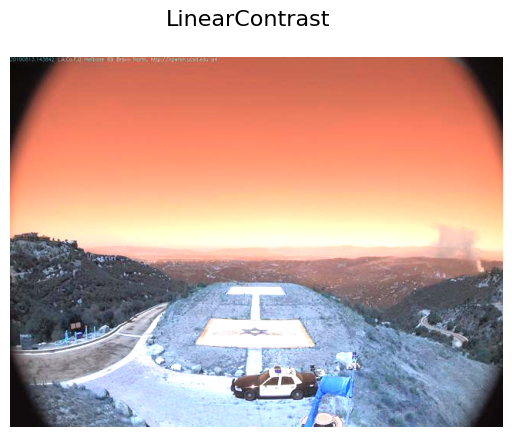

In [ ]:
# ccode is for normalization, data augmentation and to display single randomly  augmented image
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

# Define your data directory structure
data_dir = "/content/drive/MyDrive/combined_datasets"
smoke_dir = os.path.join(data_dir, "Wildfire_Smoke.v1-raw.coco")
trees_dir = os.path.join(data_dir, "trees.v1-trees.coco")

# Initialize empty lists for images and labels
combined_images = []
combined_labels = []

# Load smoke images and labels
for img_path in os.listdir(smoke_dir):
    image = cv2.imread(os.path.join(smoke_dir, img_path))
    combined_images.append(image)
    combined_labels.append(0)  # Label smoke images as 0

# Load trees images and labels
for img_path in os.listdir(trees_dir):
    image = cv2.imread(os.path.join(trees_dir, img_path))
    combined_images.append(image)
    combined_labels.append(1)  # Label trees images as 1

# Shuffle both images and labels together to maintain label-image association
combined = list(zip(combined_images, combined_labels))
random.shuffle(combined)

# Unpack shuffled data back into separate lists
combined_images, combined_labels = zip(*combined)

# Print final information
print("Number of images:", len(combined_images))
print("Unique labels:", set(combined_labels))

# Function to normalize image using min-max scaling
def normalize_image_minmax(image):
    """Normalizes an image using min-max scaling to the range [0, 1]."""
    image = image.astype(np.float32)
    min_val = np.min(image, axis=(0, 1))
    max_val = np.max(image, axis=(0, 1))
    image = (image - min_val) / (max_val - min_val)
    return image

# Function to display a single image with a given title
def display_image(image, title="Image"):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis("off")
    fig.suptitle(title, fontsize=16)
    plt.show()

# Function to display multiple images in a grid with a given title
def display_images(images, title="Images"):
    num_images = len(images)
    rows = int(np.ceil(np.sqrt(num_images)))
    cols = int(np.ceil(num_images / rows))
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    for i, image in enumerate(images):
        ax = axes.flat[i]  # Access each AxesSubplot using flat attribute
        ax.imshow(image)
        ax.axis("off")
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Process and augment a randomly chosen image
random_index = random.randint(0, len(combined_images) - 1)
random_image = combined_images[random_index]

# Normalize the random image
normalized_image = normalize_image_minmax(random_image)

# Define individual augmentation sequences
augmenters = [
    iaa.Fliplr(1.0),            # Horizontal flip
    iaa.Affine(rotate=15),      # Rotation (+15 degrees)
    iaa.Affine(translate_percent=0.2),  # Translation (20% right)
    iaa.GaussianBlur(sigma=0.5),        # Gaussian blur
    iaa.contrast.LinearContrast(1.5)    # Contrast increase
]

# Display original image
display_image(random_image, title="Original")

# Apply each augmentation separately and visualize
augmented_images = []
augmented_titles = []

for augmenter in augmenters:
    augmented_image = augmenter.augment_image(normalized_image)
    augmented_images.append(augmented_image)
    augmented_titles.append(augmenter.__class__.__name__)

# Display augmented images individually
for i in range(len(augmented_images)):
    display_image(augmented_images[i], title=augmented_titles[i])


In [ ]:
#code for combining annotation files
import json

def combine_coco_annotations(input_paths, output_path):
  """
  Combines multiple COCO annotation files into a single file.

  Args:
    input_paths: List of paths to the input COCO annotation files.
    output_path: Path to save the combined COCO annotation file.
  """
  combined_data = {"images": [], "annotations": [], "categories": []}
  image_id_mapping = {}  # To track unique image IDs

  for path in input_paths:
    with open(path) as f:
      data = json.load(f)

    # Adjust image IDs to avoid duplicates and create mapping
    for image in data["images"]:
      new_id = image["id"]
      if image["id"] in image_id_mapping:
        new_id = image_id_mapping[image["id"]] + 1
        image_id_mapping[image["id"]] += 1
      image["id"] = new_id

    # Update image file paths if necessary
    # ... (code to handle image file path adjustments)

    # Update category IDs if necessary
    # ... (code to handle category ID adjustments)

    combined_data["images"].extend(data["images"])
    combined_data["annotations"].extend(data["annotations"])
    combined_data["categories"].extend(data["categories"])

  # Optionally adjust image IDs and file paths after processing all files

  with open(output_path, "w") as f:
    json.dump(combined_data, f, indent=4)

# Replace with your actual paths
input_paths = ["/content/drive/MyDrive/combined_datasets/trees.v1-trees.coco/_annotations_trees.coco.json",
               "/content/drive/MyDrive/combined_datasets/trees.v1-trees.coco/_annotations_trees_test.coco.json",
               "/content/drive/MyDrive/combined_datasets/trees.v1-trees.coco/_annotations_trees_valid.coco.json"]
output_path = "combined_annotations_trees.json"

combined_trees_annotations=combine_coco_annotations(input_paths, output_path)

In [ ]:
import json

# Load the combined JSON file
with open("combined_annotations_trees.json", "r") as f:
    combined_trees_annotations = json.load(f)

# Inspect the combined data
print(combined_trees_annotations)


{'images': [{'id': 0, 'license': 1, 'file_name': '100_0010_0022_5_3_JPG.rf.e33dec5fb656641c1e11569b6c96bbea.jpg', 'height': 729, 'width': 1094, 'date_captured': '2023-02-08T12:53:20+00:00'}, {'id': 1, 'license': 1, 'file_name': '100_0010_0013_4_3_JPG.rf.e3cc64601bea0286173a1e27fdf6eb7d.jpg', 'height': 729, 'width': 1094, 'date_captured': '2023-02-08T12:53:20+00:00'}, {'id': 2, 'license': 1, 'file_name': '100_0010_0004_1_2_JPG.rf.e4280c9915aa1191390cdb5bb7b69e38.jpg', 'height': 729, 'width': 1094, 'date_captured': '2023-02-08T12:53:20+00:00'}, {'id': 3, 'license': 1, 'file_name': '100_0010_0030_2_1_JPG.rf.e49ec3712e7ab4937e25d9e05e161de5.jpg', 'height': 729, 'width': 1094, 'date_captured': '2023-02-08T12:53:20+00:00'}, {'id': 4, 'license': 1, 'file_name': '100_0010_0005_3_1_JPG.rf.e4d438dee05823e851a256f7d923a636.jpg', 'height': 729, 'width': 1094, 'date_captured': '2023-02-08T12:53:20+00:00'}, {'id': 5, 'license': 1, 'file_name': '100_0010_0032_3_3_JPG.rf.e4e3c3f58b3911a918f6db20c19a93

In [ ]:
import json

def combine_coco_annotations(input_paths, output_path):
  """
  Combines multiple COCO annotation files into a single file.

  Args:
    input_paths: List of paths to the input COCO annotation files.
    output_path: Path to save the combined COCO annotation file.
  """
  combined_data = {"images": [], "annotations": [], "categories": []}
  image_id_mapping = {}  # To track unique image IDs

  for path in input_paths:
    with open(path) as f:
      data = json.load(f)

    # Adjust image IDs to avoid duplicates and create mapping
    for image in data["images"]:
      new_id = image["id"]
      if image["id"] in image_id_mapping:
        new_id = image_id_mapping[image["id"]] + 1
        image_id_mapping[image["id"]] += 1
      image["id"] = new_id

    # Update image file paths if necessary
    # ... (code to handle image file path adjustments)

    # Update category IDs if necessary
    # ... (code to handle category ID adjustments)

    combined_data["images"].extend(data["images"])
    combined_data["annotations"].extend(data["annotations"])
    combined_data["categories"].extend(data["categories"])

  # Optionally adjust image IDs and file paths after processing all files

  with open(output_path, "w") as f:
    json.dump(combined_data, f, indent=4)

# Replace with your actual paths
input_paths = ["/content/drive/MyDrive/combined_datasets/Wildfire_Smoke.v1-raw.coco/_annotations_smoke.coco.json",
               "/content/drive/MyDrive/combined_datasets/Wildfire_Smoke.v1-raw.coco/_annotations_smoke_test.coco.json",
               "/content/drive/MyDrive/combined_datasets/Wildfire_Smoke.v1-raw.coco/_annotations_smoke_valid.coco.json"]
output_path = "combined_annotations_smoke.json"


combine_coco_annotations(input_paths, output_path)


In [ ]:
import json

# Load the combined JSON file
with open("combined_annotations_smoke.json", "r") as f:
    combined_smoke_annotations = json.load(f)

# Inspect the combined data
print(combined_smoke_annotations)


{'images': [{'id': 0, 'license': 1, 'file_name': 'ck0knam319ybv0701clozevt3_jpeg.rf.01d252cb506d60495e9f965a4cf48418.jpg', 'height': 480, 'width': 640, 'date_captured': '2020-10-13T07:17:39+00:00'}, {'id': 1, 'license': 1, 'file_name': 'ck0m0f8x4hwsq0838adn9hkti_jpeg.rf.02c20dbd46efee307ec38486fc3f5da2.jpg', 'height': 480, 'width': 640, 'date_captured': '2020-10-13T07:17:39+00:00'}, {'id': 2, 'license': 1, 'file_name': 'ck0rr6bfa9b3w0721aw5unwdy_jpeg.rf.00982c053d66c090d55b3d775a722aff.jpg', 'height': 480, 'width': 640, 'date_captured': '2020-10-13T07:17:39+00:00'}, {'id': 3, 'license': 1, 'file_name': 'ck0u15ceurp8s079478ps17by_jpeg.rf.01cba46fbff586f903728080476df7d9.jpg', 'height': 480, 'width': 640, 'date_captured': '2020-10-13T07:17:39+00:00'}, {'id': 4, 'license': 1, 'file_name': 'ck0uk75x5ysls0721e5a9j891_jpeg.rf.00d7fd8503e1e0e6a66294f3db79b346.jpg', 'height': 480, 'width': 640, 'date_captured': '2020-10-13T07:17:39+00:00'}, {'id': 5, 'license': 1, 'file_name': 'ck0qd8gs6ko7j07

load the combined dataset and preprocess it for training the SSD model:

In [ ]:
import numpy as np
import cv2
import os
import random
from sklearn.model_selection import train_test_split  # Import train_test_split


# Initialize empty lists for resized images and labels
resized_images = []
combined_labels = []

# Define target image size
target_size = (224, 224)  # Adjust as needed

# Load smoke images and labels
for img_path in os.listdir(smoke_dir):
    image = cv2.imread(os.path.join(smoke_dir, img_path))
    if image is not None:  # Check if the image is not empty
        # Resize image to target size
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
        combined_labels.append(0)  # Label smoke images as 0

# Load trees images and labels
for img_path in os.listdir(trees_dir):
    image = cv2.imread(os.path.join(trees_dir, img_path))
    if image is not None:  # Check if the image is not empty
        # Resize image to target size
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
        combined_labels.append(1)  # Label trees images as 1

# Convert lists to numpy arrays for easier manipulation
combined_images = np.array(resized_images)
combined_labels = np.array(combined_labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(combined_images, combined_labels, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_val = X_val / 255.0

# Print final information
print("Number of images:", len(combined_images))
print("Unique labels:", set(combined_labels))


Number of images: 1585
Unique labels: {0, 1}


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_ssd_model(input_shape, num_classes):
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Add extra layers for SSD
    layer_1 = base_model.get_layer('block4_pool').output
    layer_2 = base_model.get_layer('block5_conv3').output
    layer_3 = base_model.get_layer('block5_pool').output

    conv6 = layers.Conv2D(1024, kernel_size=(3, 3), padding='same', activation='relu')(layer_3)
    conv7 = layers.Conv2D(1024, kernel_size=(1, 1), padding='same', activation='relu')(conv6)

    # Prediction layers for classification and localization
    conv8_1 = layers.Conv2D(num_classes * 4, kernel_size=(3, 3), padding='same')(conv7)
    conv8_2 = layers.Conv2D(num_classes, kernel_size=(3, 3), padding='same')(conv7)

    # Reshape the prediction layers
    conv8_1 = layers.Reshape((-1, 2))(conv8_1)  # Adjusted to match the shape of conv8_2
    conv8_2 = layers.Reshape((-1, num_classes))(conv8_2)

    # Print information about the number of classes and the output shapes of prediction layers
    print("Number of classes:", num_classes)
    print("Shape of conv8_1 output:", conv8_1.shape)
    print("Shape of conv8_2 output:", conv8_2.shape)

    # Concatenate predictions from different layers
    prediction = layers.Concatenate(axis=1)([conv8_1, conv8_2])

    # Create the model
    model = models.Model(inputs=base_model.input, outputs=prediction)

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust according to your input size
num_classes = 2  # Adjust according to your number of classes (smoke and dead trees)

# Create and compile the model
model = create_ssd_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse')  # You may need to adjust the loss function


Number of classes: 2
Shape of conv8_1 output: (None, 196, 2)
Shape of conv8_2 output: (None, 49, 2)


In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)
